In [1]:
!git clone https://github.com/AlekhyaGudibandla/track

Cloning into 'track'...
remote: Enumerating objects: 47162, done.
remote: Counting objects: 100% (10699/10699), done.
remote: Compressing objects: 100% (10699/10699), done.
remote: Total 47162 (delta 0), reused 10697 (delta 0), pack-reused 36463 (from 1)
Receiving objects: 100% (47162/47162), 597.32 MiB | 23.34 MiB/s, done.
Updating files: 100% (47155/47155), done.


In [2]:
!ls track

driving_log.csv  IMG


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import ntpath
import random
from imgaug import augmenters as iaa

In [4]:
datadir = 'track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', None)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,D:\STUDY\sem5\btp\self_driving_car\data\IMG\center_2024_11_24_15_47_47_507.jpg,D:\STUDY\sem5\btp\self_driving_car\data\IMG\left_2024_11_24_15_47_47_507.jpg,D:\STUDY\sem5\btp\self_driving_car\data\IMG\right_2024_11_24_15_47_47_507.jpg,0.0,0.0,0.0,0.000079
1,D:\STUDY\sem5\btp\self_driving_car\data\IMG\center_2024_11_24_15_47_47_609.jpg,D:\STUDY\sem5\btp\self_driving_car\data\IMG\left_2024_11_24_15_47_47_609.jpg,D:\STUDY\sem5\btp\self_driving_car\data\IMG\right_2024_11_24_15_47_47_609.jpg,0.0,0.0,0.0,0.000079
2,D:\STUDY\sem5\btp\self_driving_car\data\IMG\center_2024_11_24_15_47_47_710.jpg,D:\STUDY\sem5\btp\self_driving_car\data\IMG\left_2024_11_24_15_47_47_710.jpg,D:\STUDY\sem5\btp\self_driving_car\data\IMG\right_2024_11_24_15_47_47_710.jpg,0.0,0.0,0.0,0.000080
3,D:\STUDY\sem5\btp\self_driving_car\data\IMG\center_2024_11_24_15_47_47_812.jpg,D:\STUDY\sem5\btp\self_driving_car\data\IMG\left_2024_11_24_15_47_47_812.jpg,D:\STUDY\sem5\btp\self_driving_car\data\IMG\right_2024_11_24_15_47_47_812.jpg,0.0,0.0,0.0,0.000080
4,D:\STUDY\sem5\btp\self_driving_car\data\IMG\center_2024_11_24_15_47_47_915.jpg,D:\STUDY\sem5\btp\self_driving_car\data\IMG\left_2024_11_24_15_47_47_915.jpg,D:\STUDY\sem5\btp\self_driving_car\data\IMG\right_2024_11_24_15_47_47_915.jpg,0.0,0.0,0.0,0.000080


In [5]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2024_11_24_15_47_47_507.jpg,left_2024_11_24_15_47_47_507.jpg,right_2024_11_24_15_47_47_507.jpg,0.0,0.0,0.0,0.000079
1,center_2024_11_24_15_47_47_609.jpg,left_2024_11_24_15_47_47_609.jpg,right_2024_11_24_15_47_47_609.jpg,0.0,0.0,0.0,0.000079
2,center_2024_11_24_15_47_47_710.jpg,left_2024_11_24_15_47_47_710.jpg,right_2024_11_24_15_47_47_710.jpg,0.0,0.0,0.0,0.000080
3,center_2024_11_24_15_47_47_812.jpg,left_2024_11_24_15_47_47_812.jpg,right_2024_11_24_15_47_47_812.jpg,0.0,0.0,0.0,0.000080
4,center_2024_11_24_15_47_47_915.jpg,left_2024_11_24_15_47_47_915.jpg,right_2024_11_24_15_47_47_915.jpg,0.0,0.0,0.0,0.000080


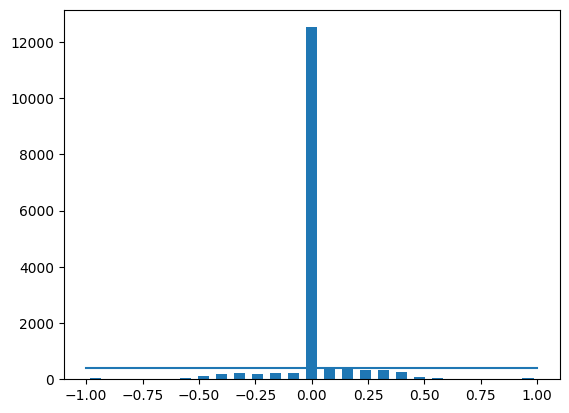

In [6]:
num_bins = 25
samples_per_bin = 400

hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5

plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total data: 15718
removed: 12119
remainind: 3599


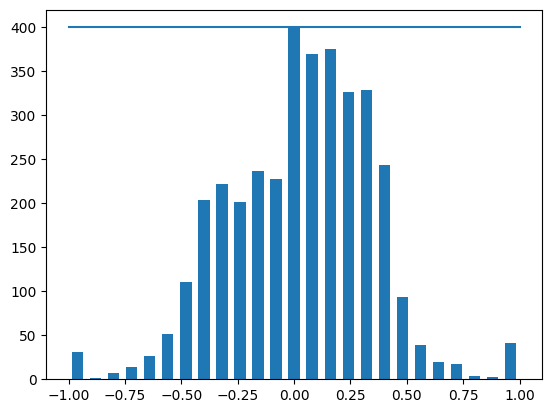

In [7]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remainind:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [8]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))

  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2024_11_24_15_47_48_933.jpg
left          left_2024_11_24_15_47_48_933.jpg
right        right_2024_11_24_15_47_48_933.jpg
steering                             -0.336901
throttle                                   1.0
reverse                                    0.0
speed                                 2.712117
Name: 14, dtype: object


<ipython-input-8-3ce3d1dea30e>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
<ipython-input-8-3ce3d1dea30e>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))


In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size = 0.2, random_state = 6)

print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 2879
Valid Samples: 720


Text(0.5, 1.0, 'Validation set')

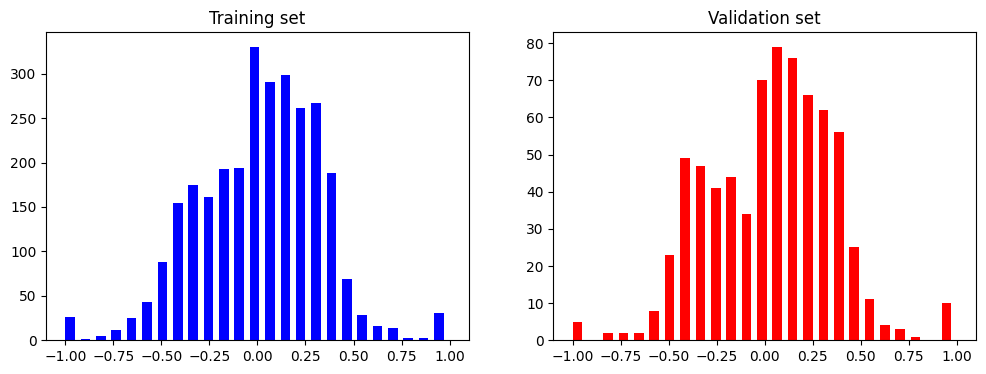

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color = 'blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color = 'red')
axes[1].set_title('Validation set')

In [11]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

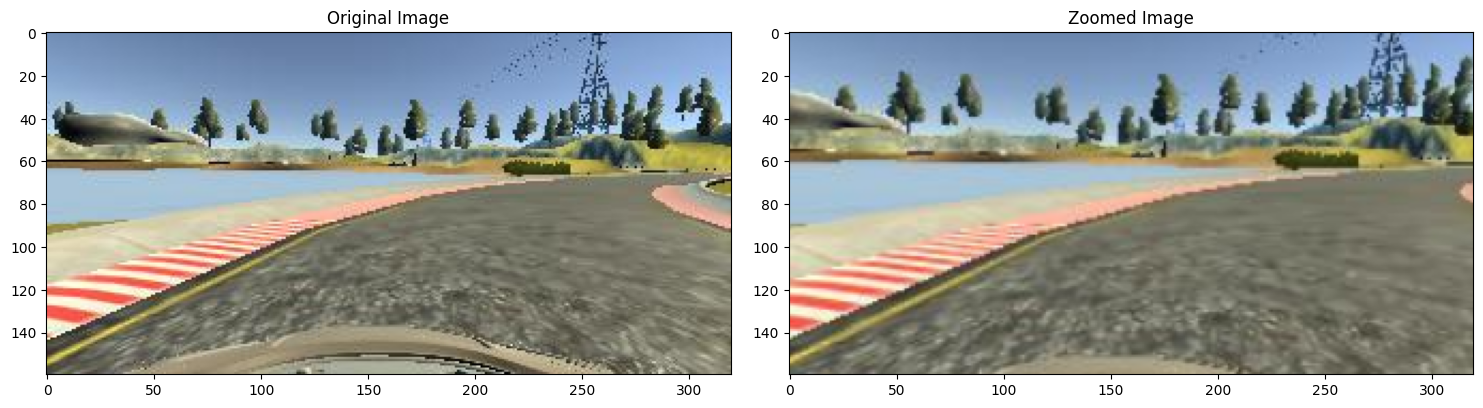

In [12]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [13]:
def pan(image):
  pan = iaa.Affine(translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned Image')

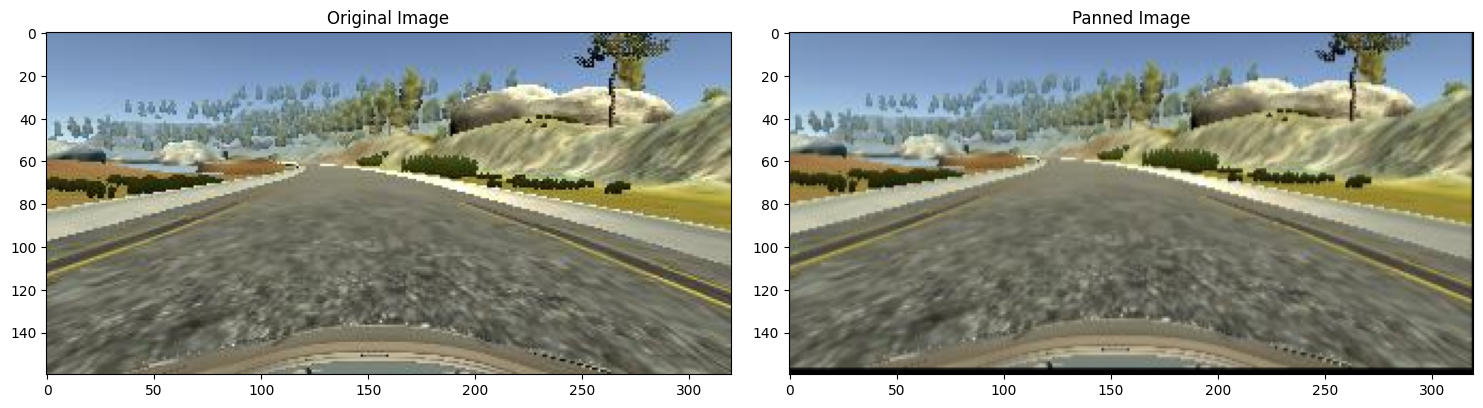

In [14]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [15]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.2))
  image = brightness.augment_image(image)
  return image

Text(0.5, 1.0, 'Brightness altered Image')

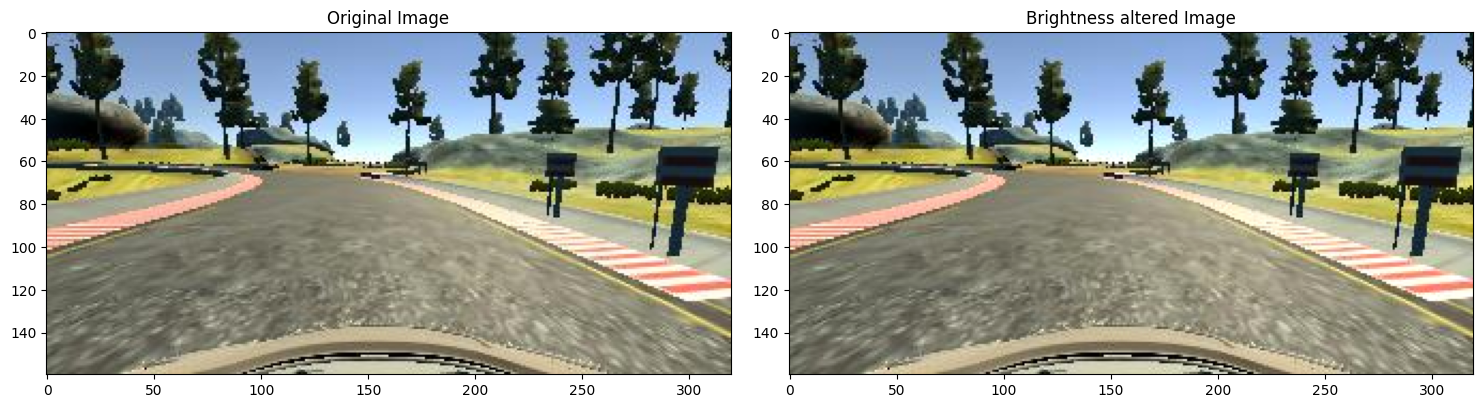

In [16]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered Image')

In [17]:
def img_random_flip(image, steering_angle):
  image = cv2.flip(image, 1)
  steering_angle = -steering_angle
  return image, steering_angle

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.4528229')

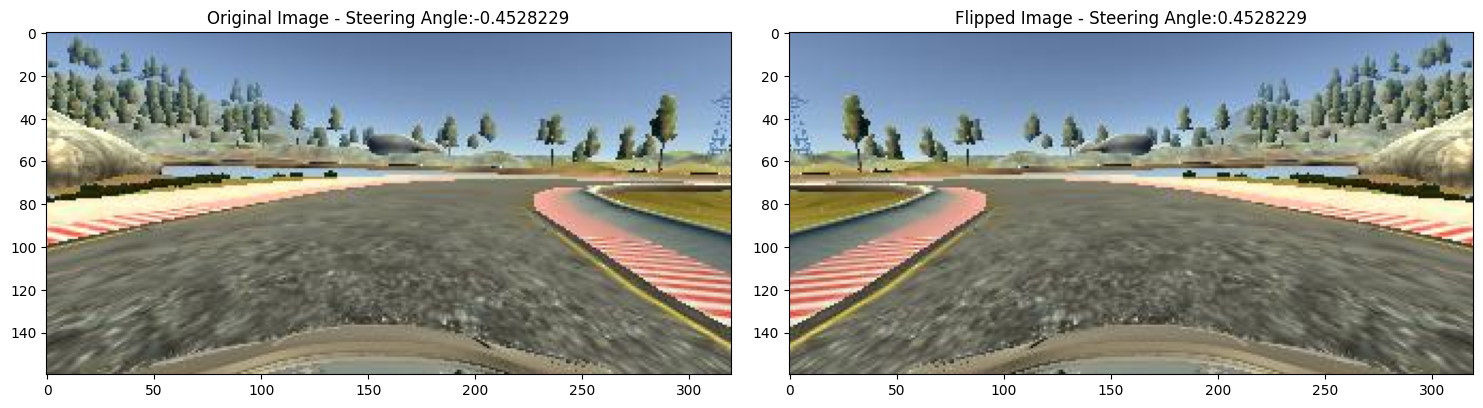

In [18]:
image = image_paths[random.randint(0, 1000)]
steering_angle = steerings[random.randint(0, 1000)]
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [19]:
def random_augment(image, steering_angle):
  image = mpimg.imread(image)
  if np.random.rand() < 0.5:
    image = pan(image)
  if np.random.rand() < 0.5:
    image = zoom(image)
  if np.random.rand() < 0.5:
    image = img_random_brightness(image)
  if np.random.rand() < 0.5:
    image, steering_angle = img_random_flip(image, steering_angle)
  return image, steering_angle

In [20]:
ncol = 2
nrow = 10
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title('Original Image')

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title('Augmented Image')

Output hidden; open in https://colab.research.google.com to view.

In [21]:
def img_preprocess(img):
  img = img[60:135, :, :]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3, 3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

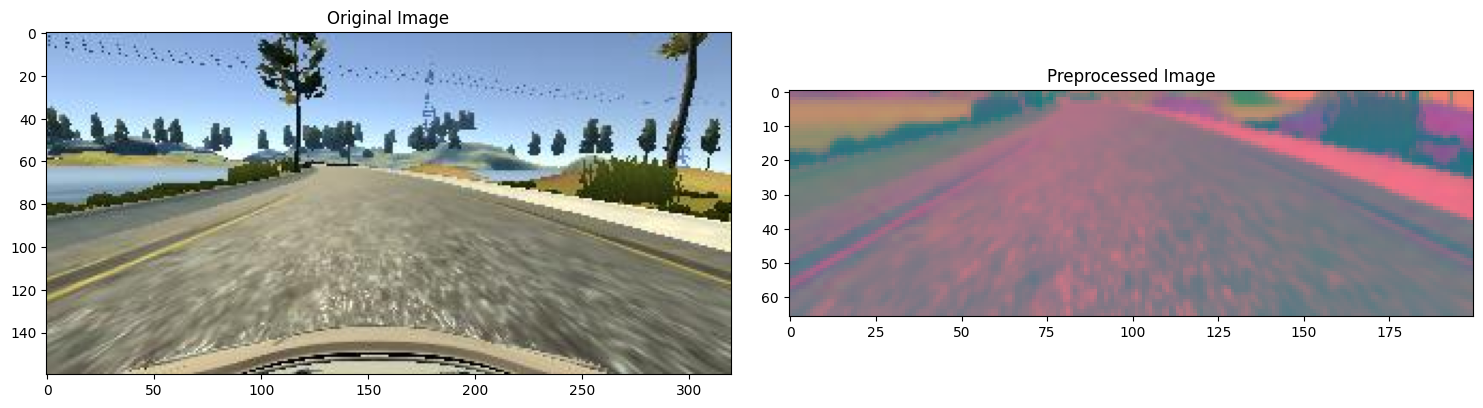

In [22]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(preprocessed_image)
axes[1].set_title('Preprocessed Image')

In [23]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)

      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]

      im =  img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

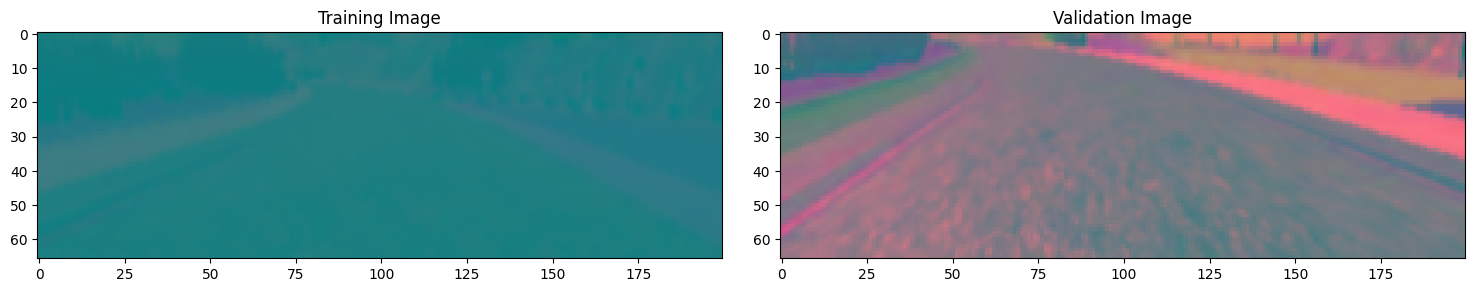

In [24]:
X_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
X_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axes[0].imshow(X_train_gen[0])
axes[0].set_title('Training Image')
axes[1].imshow(X_valid_gen[0])
axes[1].set_title('Validation Image')

In [25]:
def nvidia_model():
  model = Sequential()
  model.add(tensorflow.keras.Input(shape = (66,200,3)))
  model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  #model.add(Dropout(0.5))


  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(50, activation='elu'))
  #model.add(Dropout(0.5))
  model.add(Dense(10, activation ='elu'))
  #model.add(Dropout(0.5))
  model.add(Dense(1))


  optimizer= Adam(learning_rate = 1e-4)
  model.compile(loss='mse', optimizer = optimizer)

  return model

In [26]:
model = nvidia_model()
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 31, 98, 24)          │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 47, 36)          │          21,636 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 22, 48)           │          43,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 20, 64)           │          27,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 1, 18, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         115,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,219 (985.23 KB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

None


In [27]:
dataset_size = len(X_train)
print(f"Training Dataset Size: {dataset_size}")

Val_dataset_size = len(X_valid)
print(f"Validation Dataset Size: {Val_dataset_size}")

Training Dataset Size: 2879
Validation Dataset Size: 720


In [28]:
history = model.fit(batch_generator(X_train, y_train, 100, 1),
                    steps_per_epoch = 300,
                    epochs = 10,
                    validation_data = batch_generator(X_valid, y_valid, 100, 0),
                    validation_steps = 200, verbose = 1, shuffle = 1)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 130s 408ms/step - loss: 0.0994 - val_loss: 0.0656
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 124s 414ms/step - loss: 0.0714 - val_loss: 0.0576
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 122s 407ms/step - loss: 0.0687 - val_loss: 0.0550
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 120s 403ms/step - loss: 0.0634 - val_loss: 0.0587
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 123s 410ms/step - loss: 0.0587 - val_loss: 0.0499
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 126s 422ms/step - loss: 0.0579 - val_loss: 0.0531
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 115s 385ms/step - loss: 0.0549 - val_loss: 0.0503
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 118s 395ms/step - loss: 0.0514 - val_loss: 0.0466
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 118s 393ms/step - loss: 0.0517 - val_loss: 0.0432
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 120s 401ms/step - loss: 0.0513 - val_loss: 0.0435


Text(0.5, 0, 'Epoch')

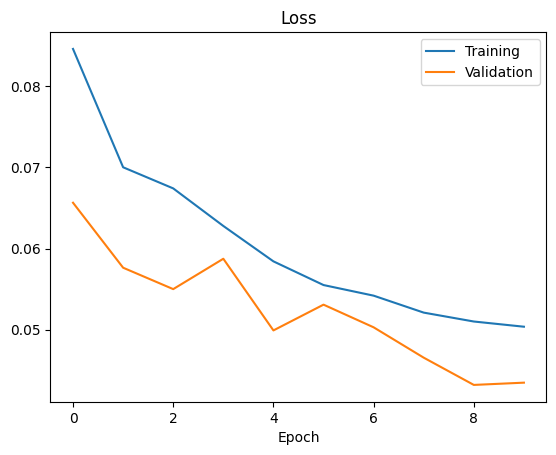

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [30]:
model.save('model.keras')

In [31]:
from google.colab import files
files.download('model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>